In [1]:
import os
import pandas as pd 
import random
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier,GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve



In [2]:
path = "/Users/chengxiaoy/PycharmProjects/chengyPython/cy_kaggle/data/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

Text(0.5,1,'train feature corr')

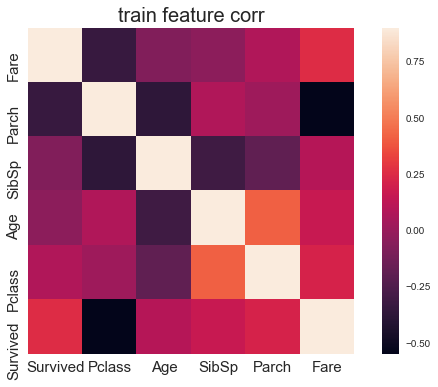

In [4]:
sns.set(context="paper", font="monospace")
sns.set(style="white")
f,ax=plt.subplots(figsize=(10,6))
train_corr = train.drop('PassengerId',axis=1).corr()
sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns[::-1], size=15)
ax.set_title('train feature corr', fontsize=20)

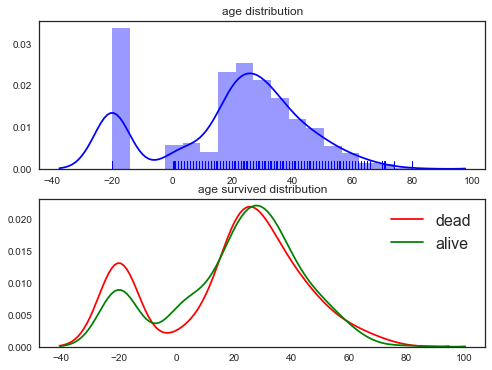

In [16]:
from scipy import stats
fig, axes = plt.subplots(2,1,figsize=(8,6))
sns.set_style('white')
sns.distplot(train.Age.fillna(-20), rug=True, color='b', ax=axes[0])
ax0 = axes[0]
ax0.set_title('age distribution')
ax0.set_xlabel('')

ax1 = axes[1]
ax1.set_title('age survived distribution')
k1 = sns.distplot(train[train.Survived==0].Age.fillna(-20), hist=False, color='r', ax=ax1, label='dead')
k2 = sns.distplot(train[train.Survived==1].Age.fillna(-20), hist=False, color='g', ax=ax1, label='alive')
ax1.set_xlabel('')

ax1.legend(fontsize=16)

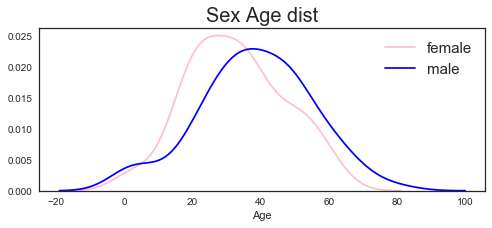

In [17]:
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Sex Age dist', size=20)
sns.distplot(train[train.Sex=='female'].dropna().Age, hist=False, color='pink', label='female')
sns.distplot(train[train.Sex=='male'].dropna().Age, hist=False, color='blue', label='male')
ax.legend(fontsize=15)

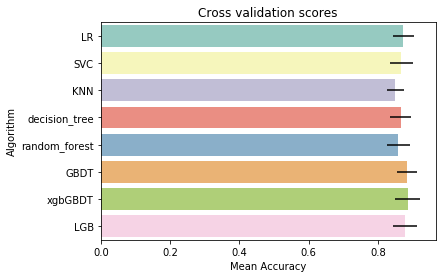

In [7]:

X_all = combine_df.iloc[:891, :].drop(["PassengerId", "Survived"], axis=1)
Y_all = combine_df.iloc[:891, :]["Survived"]
X_test = combine_df.iloc[891:, :].drop(["PassengerId", "Survived"], axis=1)

logreg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, class_weight={0: 0.745, 1: 0.255})
gbdt = GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=3)
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.03)
lgb = LGBMClassifier(max_depth=3, n_estimators=500, learning_rate=0.02)
clfs = [logreg, svc, knn, decision_tree, random_forest, gbdt, xgb,lgb]

kfold = 10
cv_results = []
for classifier in clfs:
    cv_results.append(cross_val_score(classifier, X_all.values, y=Y_all.values, scoring="accuracy", cv=kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

ag = ["LR", "SVC", 'KNN', 'decision_tree', "random_forest", "GBDT", "xgbGBDT","LGB"]
cv_res = pd.DataFrame({"CrossValMeans": cv_means, "CrossValerrors": cv_std,
                       "Algorithm": ag})

g = sns.barplot("CrossValMeans", "Algorithm", data=cv_res, palette="Set3", orient="h", **{'xerr': cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [8]:
for i in range(8):
    print(ag[i], cv_means[i])

LR 0.8730793893996142
SVC 0.8674489274770174
KNN 0.8506829531267733
decision_tree 0.8652139371240495
random_forest 0.8586738168198842
GBDT 0.8843408807172851
xgbGBDT 0.8854267393031439
LGB 0.8775865395528317


In [9]:
from sklearn.metrics import precision_score

class Bagging(object):
    
    def __init__(self,estimators):
        self.estimator_names = []
        self.estimators = []
        for i in estimators:
            self.estimator_names.append(i[0])
            self.estimators.append(i[1])
        self.clf = LogisticRegression()
    
    def fit(self, train_x, train_y):
        for i in self.estimators:
            i.fit(train_x,train_y)
        x = np.array([i.predict(train_x) for i in self.estimators]).T
        y = train_y
        self.clf.fit(x, y)
    
    def predict(self,x):
        x = np.array([i.predict(x) for i in self.estimators]).T
        #print(x)
        return self.clf.predict(x)
        
    
    def score(self,x,y):
        s = precision_score(y,self.predict(x))
        #print(s)
        return s

In [10]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, class_weight={0: 0.745, 1: 0.255})
gbdt = GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=3)
xgbGBDT = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.03)
clfs = [logreg, svc, knn, decision_tree, random_forest, gbdt, xgb]

bag = Bagging([('xgb', xgb), ('lr', lr), ('gbdt', gbdt), ('lgb', lgb)])

from sklearn.metrics import precision_score

score = 0
for i in range(0, 10):
    num_test = 0.20
    X_train, X_cv, Y_train, Y_cv = train_test_split(X_all.values, Y_all.values, test_size=num_test)
    bag.fit(X_train, Y_train)
    #Y_test = bag.predict(X_test)
    acc_xgb = round(bag.score(X_cv, Y_cv) * 100, 2)
    score += acc_xgb
score / 10


88.136

In [11]:
bag.fit(X_all.values, Y_all.values)
Y_test = bag.predict(X_test.values).astype(int)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_test
    })
submission.to_csv(r'submission5.csv', index=False)